<a href="https://colab.research.google.com/github/DeanAdrian/AIDA3-Laboratory/blob/main/58025_Lab01_Jabolt/58025_Lab01_Jabolt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing of Libraries

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Tensorflow Libraries
import tensorflow as tf
from tensorflow.keras.layers import Activation
from tensorflow.nn import sigmoid, tanh, softmax, relu, leaky_relu
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.losses import MSE, MAE

#Importing of Dataset

The following cell contains the code for importing the iris dataset as well as renaming the features to the appropriate name.

In [37]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
#df = pd.read_csv('/content/iris (1).data')
df.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


#Exploring Dataset

In [38]:
df.dropna()
df.shape

(149, 5)

In [39]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [40]:
df['Species'].value_counts() 

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Species, dtype: int64

#Dataset Visualizations

Here are basic visualizations to better see the contents of the dataset and how the three different species of irises are closely related to each other in terms of their physical characteristics.

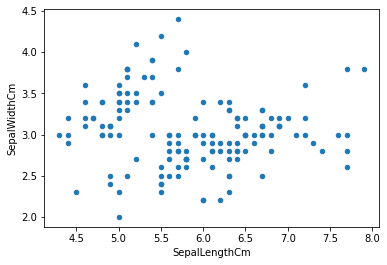

In [41]:
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

Below is a plotted figure containing all of the listed irises in the dataset. Each dot represents a specific iris species with the similar colors indicating that they are of the same species.

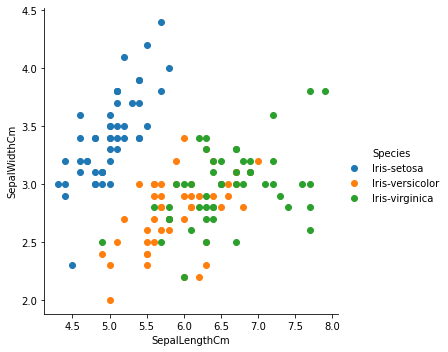

In [43]:
sns.FacetGrid(df, hue="Species", size = 5, ).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

In [ ]:
sns.pairplot(df, hue="Species", size=3)

#Initializing Models

#### Declaration of variables

In [ ]:
new_df = df.drop(df.index[100:150]) ## Remove last 50 rows to only compare setosa and versicolor species

y = new_df.iloc[:, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = new_df.iloc[:, [0, 2]].values
X_train1 = X[0:50,0:2]
y_train1 = X[50:100,0:2]
X_train2 = np.array(X_train1)
y_train2 = np.array(y_train1)

X1 = np.append(X_train2,np.ones((X_train2.shape[0],1)),axis=1)
X2 = np.append(y_train2,np.zeros((y_train2.shape[0],1)),axis=1)

new_df2 = np.vstack((X1,X2)) 
np.random.shuffle(new_df2)
X_train = new_df2[:,0:2]
y_train = new_df2[:,-1]

#### Plotting of the two iris species

Below is the same plot of the iris dataset but only with the iris-sertosa and the iris-versicolor involved.

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X_train2[:,0], X_train2[:,1], label='Iris-setosa')
plt.scatter(y_train2[:,0], y_train2[:,1], label='Iris-versicolor')
plt.ylabel("Sepal length")
plt.xlabel("Sepal width")
plt.legend()
plt.grid()
plt.show()

#### Models

Here is the class for the multilayer perceptron classifiers where the bases of the models and their training is contained. Their are 5 functions in total, the first are the neurons given a default value of 1 which can be changed when calling the class function.

Followed by three functions that each have a set number of layers respectively, followed by the training function that also plots the progress of the model through each iteration/epoch.

In [ ]:
class ModelsClass():
  def __init__(self, unit1 = 1,unit2 = 1,unit3 = 1,unit4 = 1,unit5 = 1):
    self.unit1 = unit1
    self.unit2 = unit2
    self.unit3 = unit3
    self.unit4 = unit4
    self.unit5 = unit5

  def model_3layer(self,lr,activation1,activation2,activation3):
   self.model = tf.keras.Sequential()
   self.model.add(tf.keras.layers.Dense(self.unit1, input_dim=2, activation = activation1))
   self.model.add(tf.keras.layers.Dense(self.unit2, activation = activation2))
   self.model.add(tf.keras.layers.Dense(self.unit3, activation = activation3))
   self.model.compile(optimizer=SGD(learning_rate=lr),
              loss='binary_crossentropy',
              metrics = ['accuracy'])
   return self.model.summary()

  def model_4layer(self,lr,activation1,activation2,activation3,activation4):
   self.model = tf.keras.Sequential()
   self.model.add(tf.keras.layers.Dense(self.unit1, input_dim=2, activation = activation1))
   self.model.add(tf.keras.layers.Dense(self.unit2, activation = activation2))
   self.model.add(tf.keras.layers.Dense(self.unit3, activation = activation3))
   self.model.add(tf.keras.layers.Dense(self.unit4, activation = activation4))
   self.model.compile(optimizer=SGD(learning_rate=lr),
              loss='binary_crossentropy',
              metrics = ['accuracy'])
   return self.model.summary()

  def model_5layer(self,lr,activation1,activation2,activation3,activation4,activation5):
   self.model = tf.keras.Sequential()
   self.model.add(tf.keras.layers.Dense(self.unit1, input_dim=2, activation = activation1))
   self.model.add(tf.keras.layers.Dense(self.unit2, activation = activation2))
   self.model.add(tf.keras.layers.Dense(self.unit3, activation = activation3))
   self.model.add(tf.keras.layers.Dense(self.unit4, activation = activation4))
   self.model.add(tf.keras.layers.Dense(self.unit5, activation = activation5))
   self.model.compile(optimizer=SGD(learning_rate=lr),
              loss='binary_crossentropy',
              metrics = ['accuracy'])
   return self.model.summary()

  def history(self):
    history = self.model.fit(X_train, y_train, epochs=100, batch_size=5)
    plt.figure(figsize=(5,5))
    plt.title('Loss Curve')

    plt.subplot()
    plt.plot(history.history['loss'], color = 'blue')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    
    plt.subplot()
    plt.plot(history.history['accuracy'], color = 'green')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')

    plt.show()

## Initializing and Training models

Below are nine different models build and trained with the class above.



In [ ]:
models = ModelsClass()

### Model 1

In [ ]:
models.__init__(3,10,1) # Parameters are the Neurons
models.model_3layer(0.05,relu,relu,sigmoid) 

In [ ]:
models.history()

### Model 2

In [ ]:
models.__init__(5,10,1) # Parameters are the Neurons
models.model_3layer(0.009,relu,relu,sigmoid)

In [ ]:
models.history()

### Model 3

In [ ]:
models.__init__(5,2,1) # Parameters are the Neurons
models.model_3layer(0.01,relu,sigmoid,sigmoid)

In [ ]:
models.history()

### Model 4

In [ ]:
models.__init__(5,16,11,1) # Parameters are the Neurons
models.model_4layer(0.03,relu,relu,tanh,sigmoid)

In [ ]:
models.history()

### Model 5

In [ ]:
models.__init__(5,13,18,1) # Parameters are the Neurons
models.model_4layer(0.9,relu,relu,tanh,sigmoid)

In [ ]:
models.history()

### Model 6

In [ ]:
models.__init__(2,13,11,1) # Parameters are the Neurons
models.model_4layer(0.05,relu,relu,tanh,sigmoid)

In [ ]:
models.history()

### Model 7

In [ ]:
models.__init__(2,13,9,12,1) # Parameters are the Neurons
models.model_5layer(0.5,relu,sigmoid,relu,sigmoid,sigmoid)

In [ ]:
models.history() # Parameters are the Neurons

### Model 8

In [ ]:
models.__init__(2,10,5,6,1) # Parameters are the Neurons
models.model_5layer(0.3,relu,tanh,relu,tanh,sigmoid)

In [ ]:
models.history() # Parameters are the Neurons

### Model 9

In [ ]:
models.__init__(2,16,10,12,1) # Parameters are the Neurons
models.model_5layer(0.7,sigmoid,tanh,tanh,sigmoid,sigmoid)

In [ ]:
models.history()

## Analysis of Models

As can be seen in the figures of all 9 models changes between the variables either being, the neurons, the activation function, learning rate or the number of perceptrons can result in big changes to the results in the models accuracy after a set number of epochs.

Some models are able to hit 100 percent accuracy after only a few epochs while some models seem to max out at  near 50 percent accuracy. 

Since some of the models that only had 3 layers was able to reach 100 percent accuracy, while another model with 5 layer got stuck within the 50 percent limit, it is quite clear that the higher number of layers when it comes to classifiers, does not always translate to higher accuracy and better performance. But instead is also dependent on the other variables mentioned above.